# Projeto EletroMag - Ligar Arduino sem fio Para Mostrar uma Mensagem em um Display LCD
### Camila Junqueira, João Vitor Oliveira, Lucca Nasser, Stephani Ferreira

Imports

In [1]:
from cmath import *
from math import *
from numpy import linalg
import numpy as np
import matplotlib.pyplot as plt

## Esquema das Bobinas
### Diagrama do Modelo Eletrodinâmico do Circuito WPT em abordagem Fasorial

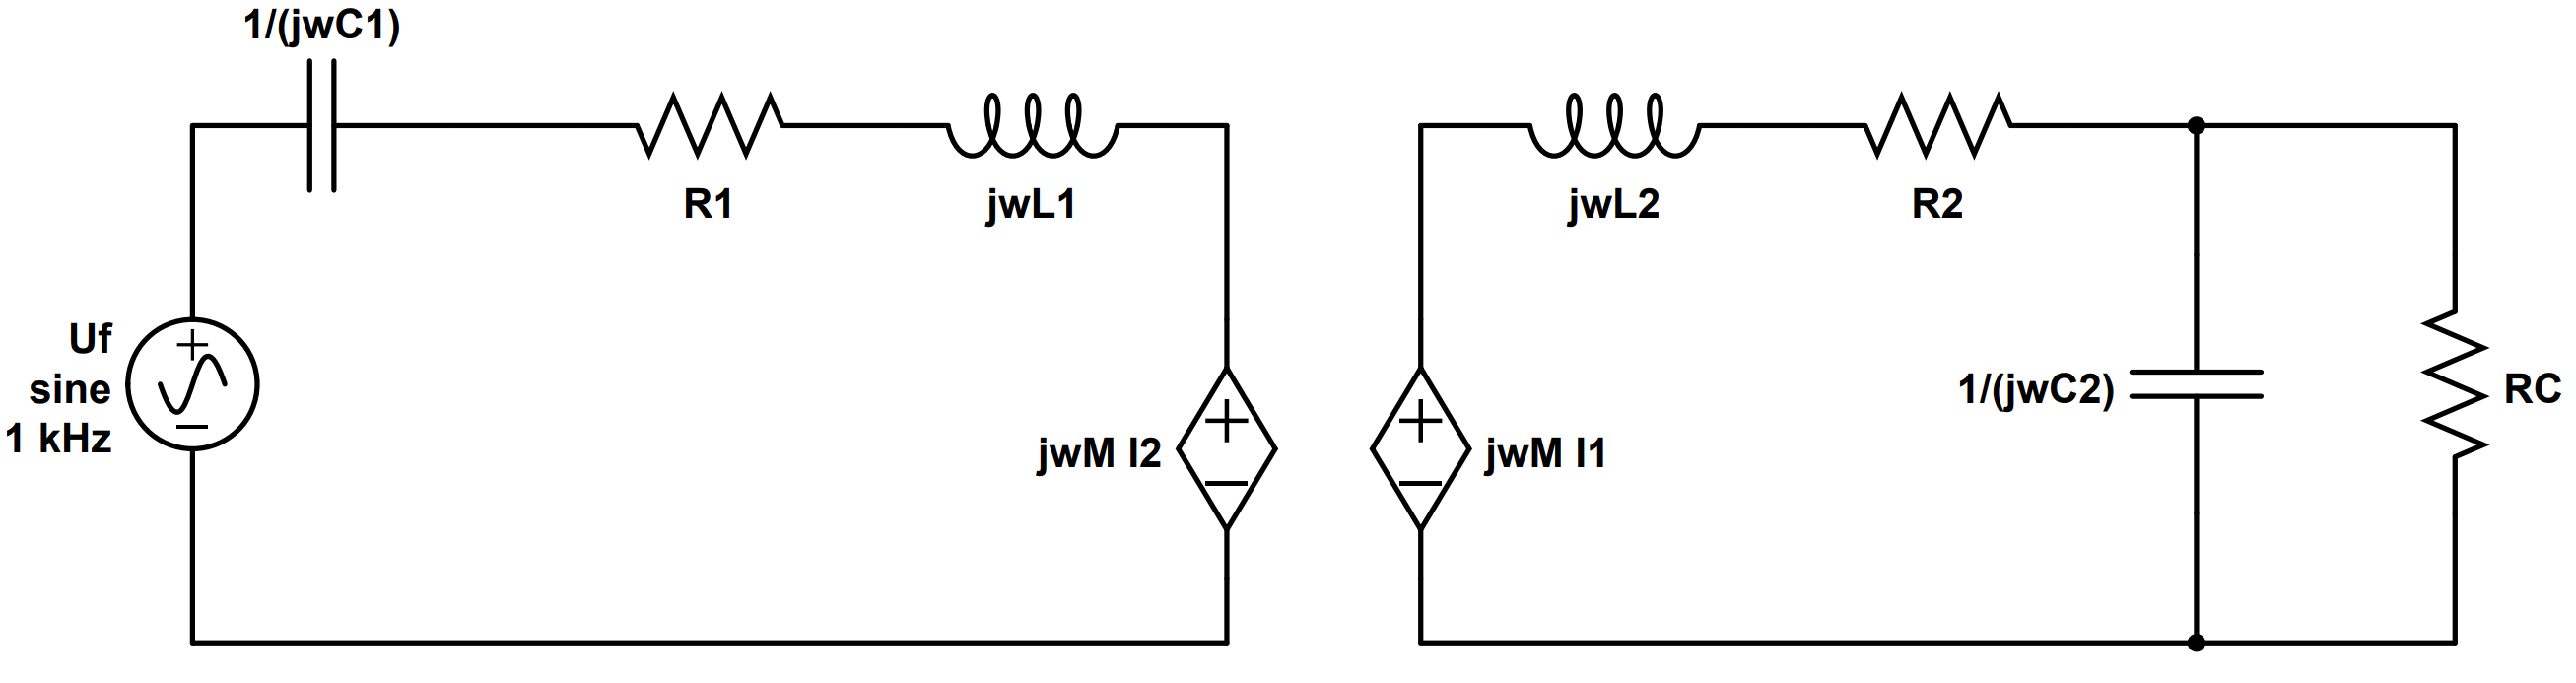

### Definindo os Parâmetros

In [2]:
# Resistências
R1 = 10
R2 = 10

# Indutâncias
L1 = 1*10**-3
L2 = 1*10**-3

# Capacitâncias
C1 = 1*10**-6
C2 = 1*10**-6

# Frequência
freq = 1/(sqrt(L1*C1))

# Frequência Angular
w = 2 * pi * freq

# Tensão de Pico
t_pico = 1 / w

# Indutância Mútua
k = 0.1
M = k * sqrt(L1 * L2)

# Impedâncias
XL1 = 1j * w * L1
XL2 = 1j * w * L2

XC1 = 1/(1j * w * C1)
XC2 = 1/(1j * w * C2)

XM = 1j * w * M

### Função de Cálculo das correntes $Î_1$ e $Î_2$

In [3]:
def CalculaLeonardo(Uf, Rc):
    Z=np.array([
        [R1+XL1+XC1             ,    -XM],
        [-XM, R2+XL2+(Rc/(Rc*1j*w*C2+1))]
                ])
    V=np.array([Uf,
                0])
    i=np.dot(linalg.inv(Z),V)
    return i[0], i[1]

## Simulação
- Escolha dos valores de Frequência de Operação, Capacitores e Indutâncias

### Gráfico $V_2$ x $f$

In [4]:
Uf = 10
Rc = 102
k = 0.1

Capacitor 1:
Índices: [733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 92

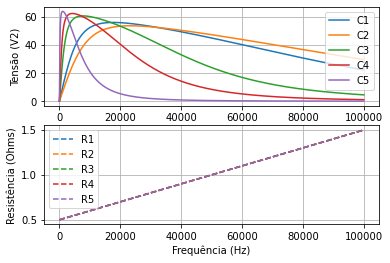

In [5]:
capacitores = [150*10**-9, 0.1*10**-6, 0.47*10**-6, 1*10**-6, 4.7*10**-6]
frequencias = np.arange(1*10**-10,100*10**3,1)

V2_list = []
L_list = []
R_list = []

Rdc = 0.5

n = 0
for C in capacitores:
    V2_list = []
    L_list = []
    R_list = []
    n = n + 1
    for f in frequencias:
        
        C1 = C2 = C

        R = R1 = R2 = Rdc + (2*Rdc/(100*10**3)) * f
        w = 2 * pi * f
        L = L1 = L2 = 1/((f**2)*4*(pi**2)*C)

        L_list.append(L)

        XC = XC1 = XC2 = 1/(1j * w * C)
        XL = XL1 = XL2 = 1j * w * L
        
        M = k * sqrt(L**2)
        XM = 1j * w * M

        i1, i2 = CalculaLeonardo(Uf, Rc)

        V2 = ((Rc*XC)/(Rc+XC))*i2
        R_list.append(R)
        V2_list.append(abs(V2))
        L_list.append(L)


    indices = [i for i, v in enumerate(V2_list) if 7 <= v <= 12]
    L_values = [L_list[i] for i in indices]

    print(f"Capacitor {n}:")
    print("Índices:", indices, "\n")
    for i in indices:
        print(f"Frequência: {frequencias[i]:.2f} Hz, Tensão V2: {V2_list[i]:.2f} V e Indutância: {L_list[i]} H")
    print()
    

    plt.subplot(2, 1, 1)  # This means 2 rows, 1 column, and this is the 1st subplot
    plt.plot(frequencias, V2_list, label="C" + str(n))
    plt.xlabel("Frequência (Hz)")
    plt.ylabel("Tensão (V2)")
    plt.legend()
    plt.grid()

    plt.subplot(2, 1, 2)  # This means 2 rows, 1 column, and this is the 2nd subplot
    plt.plot(frequencias, R_list, label="R" + str(n), linestyle="--")
    plt.xlabel("Frequência (Hz)")
    plt.ylabel("Resistência (Ohms)")
    plt.legend()
    plt.grid()


    #plt.plot(frequencias, V2_list, label = "C" + str(n))
    #plt.plot(frequencias, R_list, label = "R" + str(n), linestyle="--")

#plt.xlabel("Frequência (Hz)")
#plt.ylabel("Tensão (V2)")
#plt.legend()
#plt.grid()
plt.show()

## Simulação

Valores foram mudados na primeira seção do jupyter (definindo parâmetros)

Tensão: 7 a 12 V\
Corrente máxima:
- Pinos Digitais: Até 40mA
- Corrente total no Arduino: Não deve exceder 200mA

Capacitor escolhido: Capacitor 5 ($4,7 uF$)\
Frequência: 15000.00 Hz, Tensão V2: 10.01 V

In [6]:
f = 10000
C = 4.7*10**-6
R = Rdc + (2*Rdc/(100*10**3)) * f
L = 9.3*10**-5

w = 2 * pi * f

XC = 1/(1j * w * C)
XL = 1j * w * L

M = k * sqrt(L**2)
XM = 1j * w * M

print(f'L = {L} H')
print(f'R fio = {R} Ohms')
print(1/(2*pi*sqrt(L*C)))

L = 9.300000000000001e-05 H
R fio = 0.6 Ohms
7612.542467227258


In [7]:
i1, i2 = CalculaLeonardo(Uf,Rc)
i1, i2

((6.445995915953377-0.3651454448605509j),
 (-0.9373276623499333+0.566575486869459j))

In [8]:
V2 = ((Rc*XC)/(Rc+XC))*i2
abs(V2)

3.7068043266406385